In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ds=xr.open_dataset("ecmwf lst.nc")

In [5]:
ds

<xarray.Dataset>
Dimensions:     (valid_time: 72, latitude: 21, longitude: 21)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2019-01-01 2019-02-01 ... 2024-12-01
  * latitude    (latitude) float64 21.0 20.75 20.5 20.25 ... 16.5 16.25 16.0
  * longitude   (longitude) float64 69.0 69.25 69.5 69.75 ... 73.5 73.75 74.0
    expver      (valid_time) object ...
Data variables:
    msl         (valid_time, latitude, longitude) float32 ...
    tcc         (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    skt         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [6]:
konkan_lst=ds['skt']

In [7]:
konkan_lst

<xarray.DataArray 'skt' (valid_time: 72, latitude: 21, longitude: 21)>
array([[[298.12598, 298.02246, ..., 294.23535, 291.75684],
        [298.24316, 298.22754, ..., 294.1162 , 291.4795 ],
        ...,
        [299.37207, 299.46582, ..., 298.4756 , 296.54395],
        [299.47754, 299.55762, ..., 298.51465, 297.44824]],

       [[297.39062, 297.3203 , ..., 296.82227, 294.7207 ],
        [297.5    , 297.5    , ..., 296.55664, 294.28516],
        ...,
        [299.35352, 299.6621 , ..., 300.02734, 298.93164],
        [299.32812, 299.6172 , ..., 300.0039 , 299.5996 ]],

       ...,

       [[301.6023 , 301.53784, ..., 298.4851 , 295.50854],
        [301.6648 , 301.62378, ..., 297.89722, 294.93823],
        ...,
        [302.18433, 302.1765 , ..., 299.2019 , 297.22144],
        [302.20386, 302.19604, ..., 299.46948, 297.989  ]],

       [[298.73816, 298.4745 , ..., 296.43542, 294.15417],
        [298.87878, 298.6659 , ..., 295.93542, 293.6327 ],
        ...,
        [300.62683, 300.71472, ..., 299.81238, 297.93933],
        [300.58582, 300.66394, ..., 299.6659 , 298.42175]]], dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2019-01-01 2019-02-01 ... 2024-12-01
  * latitude    (latitude) float64 21.0 20.75 20.5 20.25 ... 16.5 16.25 16.0
  * longitude   (longitude) float64 69.0 69.25 69.5 69.75 ... 73.5 73.75 74.0
    expver      (valid_time) object '0001' '0001' '0001' ... '0001' '0005'
Attributes:
    GRIB_paramId:                             235
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      441
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_uvRelativeToGrid:                    0
    GRIB_NV:                                  0
    GRIB_Nx:                                  21
    GRIB_Ny:                                  21
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           skt
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   21.0
    GRIB_latitudeOfLastGridPointInDegrees:    16.0
    GRIB_longitudeOfFirstGridPointInDegrees:  69.0
    GRIB_longitudeOfLastGridPointInDegrees:   74.0
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Skin temperature
    GRIB_shortName:                           skt
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                Skin temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [15]:
noaa_airtemp = xr.open_dataset("air.2m.mon.mean.nc")

In [16]:
noaa_airtemp              #or print(noaa_airtemp.dims) or coords or info

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 925)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2025-01-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [10]:
print(noaa_airtemp.coords['lat'].values)

[ 88.542     86.6531    84.7532    82.8508    80.9473    79.0435
  77.1394    75.2351    73.3307    71.4262    69.5217    67.6171
  65.7125    63.8079    61.9033    59.9986    58.0939    56.1893
  54.2846    52.3799    50.4752    48.5705    46.6658    44.7611
  42.8564    40.9517    39.047     37.1422    35.2375    33.3328
  31.4281    29.5234    27.6186    25.7139    23.8092    21.9044
  19.9997    18.095     16.1902    14.2855    12.3808    10.47604
   8.57131    6.66657    4.76184    2.8571     0.952368  -0.952368
  -2.8571    -4.76184   -6.66657   -8.57131  -10.47604  -12.3808
 -14.2855   -16.1902   -18.095    -19.9997   -21.9044   -23.8092
 -25.7139   -27.6186   -29.5234   -31.4281   -33.3328   -35.2375
 -37.1422   -39.047    -40.9517   -42.8564   -44.7611   -46.6658
 -48.5705   -50.4752   -52.3799   -54.2846   -56.1893   -58.0939
 -59.9986   -61.9033   -63.8079   -65.7125   -67.6171   -69.5217
 -71.4262   -73.3307   -75.2351   -77.1394   -79.0435   -80.9473
 -82.8508   -84.7532  

In [11]:
print(noaa_airtemp.coords['lon'].values)

[  0.      1.875   3.75    5.625   7.5     9.375  11.25   13.125  15.
  16.875  18.75   20.625  22.5    24.375  26.25   28.125  30.     31.875
  33.75   35.625  37.5    39.375  41.25   43.125  45.     46.875  48.75
  50.625  52.5    54.375  56.25   58.125  60.     61.875  63.75   65.625
  67.5    69.375  71.25   73.125  75.     76.875  78.75   80.625  82.5
  84.375  86.25   88.125  90.     91.875  93.75   95.625  97.5    99.375
 101.25  103.125 105.    106.875 108.75  110.625 112.5   114.375 116.25
 118.125 120.    121.875 123.75  125.625 127.5   129.375 131.25  133.125
 135.    136.875 138.75  140.625 142.5   144.375 146.25  148.125 150.
 151.875 153.75  155.625 157.5   159.375 161.25  163.125 165.    166.875
 168.75  170.625 172.5   174.375 176.25  178.125 180.    181.875 183.75
 185.625 187.5   189.375 191.25  193.125 195.    196.875 198.75  200.625
 202.5   204.375 206.25  208.125 210.    211.875 213.75  215.625 217.5
 219.375 221.25  223.125 225.    226.875 228.75  230.625 232.5  

In [7]:
noaa_precip = xr.open_dataset("precip.mon.mean.nc")

In [8]:
noaa_precip

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 552)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2501
    history:        update 01/2025 V2501
    data_modified:  2025-01-13

In [14]:
 print(noaa_precip.coords['lat'].values)
    # OR can also see from the above cell in the last symbol of database in lat or lon line

[ 88.75  86.25  83.75  81.25  78.75  76.25  73.75  71.25  68.75  66.25
  63.75  61.25  58.75  56.25  53.75  51.25  48.75  46.25  43.75  41.25
  38.75  36.25  33.75  31.25  28.75  26.25  23.75  21.25  18.75  16.25
  13.75  11.25   8.75   6.25   3.75   1.25  -1.25  -3.75  -6.25  -8.75
 -11.25 -13.75 -16.25 -18.75 -21.25 -23.75 -26.25 -28.75 -31.25 -33.75
 -36.25 -38.75 -41.25 -43.75 -46.25 -48.75 -51.25 -53.75 -56.25 -58.75
 -61.25 -63.75 -66.25 -68.75 -71.25 -73.75 -76.25 -78.75 -81.25 -83.75
 -86.25 -88.75]


In [15]:
print(noaa_precip.coords['lon'].values)

[  1.25   3.75   6.25   8.75  11.25  13.75  16.25  18.75  21.25  23.75
  26.25  28.75  31.25  33.75  36.25  38.75  41.25  43.75  46.25  48.75
  51.25  53.75  56.25  58.75  61.25  63.75  66.25  68.75  71.25  73.75
  76.25  78.75  81.25  83.75  86.25  88.75  91.25  93.75  96.25  98.75
 101.25 103.75 106.25 108.75 111.25 113.75 116.25 118.75 121.25 123.75
 126.25 128.75 131.25 133.75 136.25 138.75 141.25 143.75 146.25 148.75
 151.25 153.75 156.25 158.75 161.25 163.75 166.25 168.75 171.25 173.75
 176.25 178.75 181.25 183.75 186.25 188.75 191.25 193.75 196.25 198.75
 201.25 203.75 206.25 208.75 211.25 213.75 216.25 218.75 221.25 223.75
 226.25 228.75 231.25 233.75 236.25 238.75 241.25 243.75 246.25 248.75
 251.25 253.75 256.25 258.75 261.25 263.75 266.25 268.75 271.25 273.75
 276.25 278.75 281.25 283.75 286.25 288.75 291.25 293.75 296.25 298.75
 301.25 303.75 306.25 308.75 311.25 313.75 316.25 318.75 321.25 323.75
 326.25 328.75 331.25 333.75 336.25 338.75 341.25 343.75 346.25 348.75
 351.2

# DATA EXTRACTION

In [12]:
lat_min, lat_max = 15, 22 
lon_min, lon_max = 68, 75

In [13]:
konkan_precip = noaa_precip.sel(lat=slice(lat_max,lat_min), lon=slice(lon_min, lon_max))               
#(lat_max,lat_min) because in dataset the numbers are stored in descending order and for lon its in ascending order so its 
#  ..lon_min,lon_max
print(konkan_precip.coords['lat'].values)
print(konkan_precip.coords['lon'].values)

[21.25 18.75 16.25]
[68.75 71.25 73.75]


In [17]:
konkan_airtemp=noaa_airtemp.sel(lat=slice(lat_max,lat_min), lon=slice(lon_min, lon_max))
print(konkan_airtemp.info())

xarray.Dataset {
dimensions:
	lat = 4 ;
	lon = 4 ;
	time = 925 ;

variables:
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:actual_range = [ 88.542 -88.542] ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [  0.    358.125] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
	datetime64[ns] time(time) ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0017-00-00 00:00:00 ;
		time:prev_avg_period = 0000-00-01 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:actual_range = [1297320. 1972320.] ;
	float32 air(time, lat, lon) ;
		air:long_name = Monthly Mean of Air Temperature ;
		air:valid_range = [150. 400.] ;
		air:units = degK ;
		air:precision = 2 ;
		air:GRIB_id = 11 ;
		air:GRIB_name = TMP ;
		air:var_desc = Air temperature ;
		air:level_desc = 2 m ;
		air:statistic = Mean ;
		air:parent_stat

In [20]:
noaa_precip_file = r"C:\Users\Admin\RIYA PROJECT\DATASETS\noaa_precip.nc"
# Save to new NetCDF file
konkan_precip.to_netcdf(noaa_precip_file, format="NETCDF4") 
print(f"noaa_output_file saved to : {noaa_precip_file}") 

noaa_output_file saved to : C:\Users\Admin\RIYA PROJECT\DATASETS\noaa_precip.nc


In [19]:
print(konkan_airtemp.coords['lat'].values)
print(konkan_airtemp.coords['lon'].values)

[21.9044 19.9997 18.095  16.1902]
[69.375 71.25  73.125 75.   ]


# DATA CLEANING

In [20]:
# Get unique values in the 'air' variable 
unique_values = np.unique(konkan_airtemp["air"].values)
# Print min, max, and any extreme values 
print("Min:", unique_values.min()) 
print("Max:", unique_values.max()) 
print("Extreme values:", unique_values[(unique_values < -100) | (unique_values > 100)])

Min: 289.44998
Max: 308.98227
Extreme values: [289.44998 289.79456 289.8235  ... 308.78796 308.8326  308.98227]


In [21]:
# Get unique values in the 'air' variable 
unique_values = np.unique(konkan_precip["precip"].values)
# Print min, max, and any extreme values 
print("Min:", unique_values.min()) 
print("Max:", unique_values.max()) 
print("Extreme values:", unique_values[(unique_values < -100) | (unique_values > 100)])

Min: 0.0
Max: 48.82
Extreme values: []


## slice the time period from January 2019 to January 2025

In [22]:
konkan_airtemp = konkan_airtemp.sel(time=slice("2019-01-01", "2025-01-01"))

## convert air temperature from Kelvin to Celsius

In [23]:
konkan_airtemp["air"] = konkan_airtemp["air"] - 273.15

In [24]:
konkan_airtemp

<xarray.Dataset>
Dimensions:  (lat: 4, lon: 4, time: 73)
Coordinates:
  * lat      (lat) float32 21.9 20.0 18.09 16.19
  * lon      (lon) float32 69.38 71.25 73.12 75.0
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2025-01-01
Data variables:
    air      (time, lat, lon) float32 22.42 19.39 18.11 ... 27.22 26.64 22.87
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

## replace missing values in the ECMWF dataset 

In [25]:
#not needed after checking because no difference seen

'''# Define missing value placeholder 
ecmwf_missing_value = 3.4028234663852886e+38 
# Replace missing values with NaN 
for var in ds.data_vars:
    ds[var] = ds[var].where(ds[var] != ecmwf_missing_value, np.nan)
# Save the cleaned dataset (optional)
ds.to_netcdf("cleaned_lst.nc")'''

'# Define missing value placeholder \necmwf_missing_value = 3.4028234663852886e+38 \n# Replace missing values with NaN \nfor var in ds.data_vars:\n    ds[var] = ds[var].where(ds[var] != ecmwf_missing_value, np.nan)\n# Save the cleaned dataset (optional)\nds.to_netcdf("cleaned_lst.nc")'

In [26]:
#cleaned_lst=xr.open_dataset("cleaned_lst.nc")

In [27]:
#cleaned_lst

# DATA PLOTTING

## Plot Time Series (Change in Air Temperature Over Time)

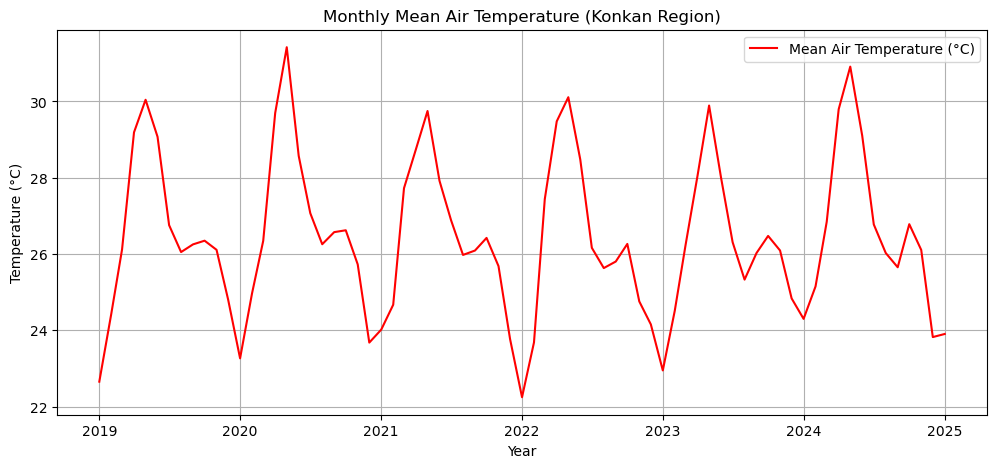

In [29]:
# Compute regional mean over lat & lon
mean_air_temp = konkan_airtemp['air'].mean(dim=["lat", "lon"])

# Plot time series
plt.figure(figsize=(12, 5))
plt.plot(mean_air_temp["time"], mean_air_temp, label="Mean Air Temperature (°C)", color="red")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Mean Air Temperature (Konkan Region)")
plt.legend()
plt.grid()
plt.show()

## 2. Map Visualization (Temperature Distribution Over Region)
For ECMWF Data (Latest Month Skin Temperature)


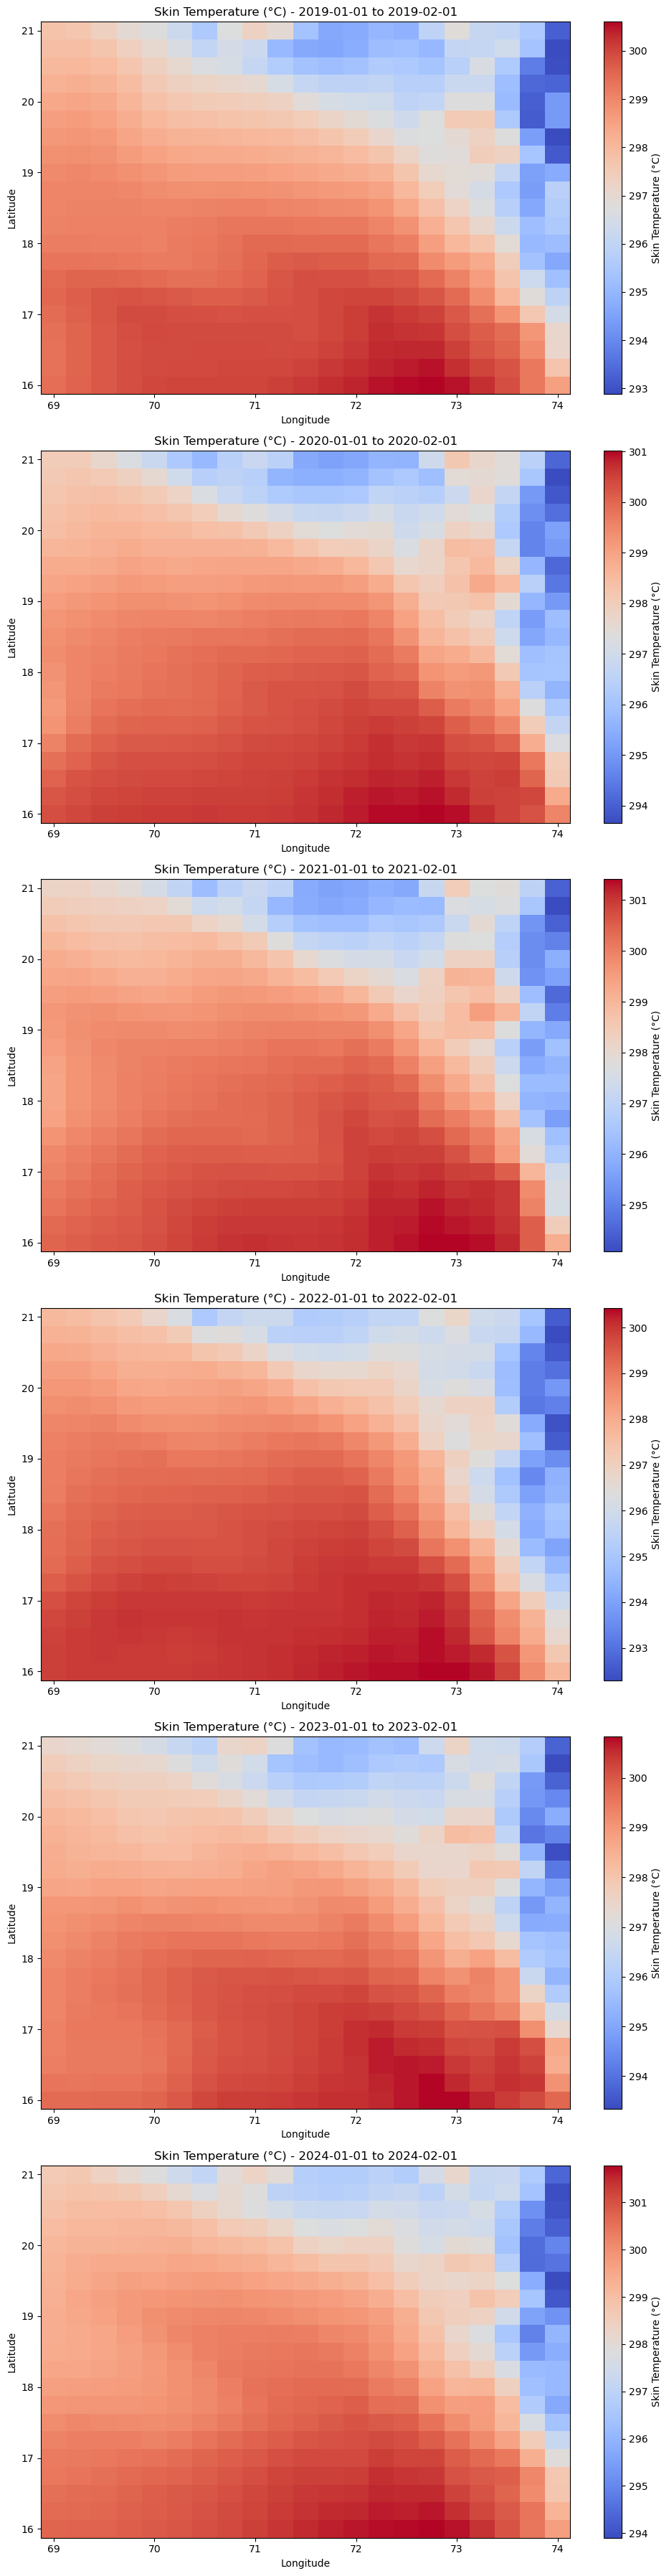

In [30]:

# Define the time ranges you want to plot
time_ranges = [
    slice("2019-01-01", "2019-02-01"),  # January 2019
    slice("2020-01-01", "2020-02-01"),  # January 2020
    slice("2021-01-01", "2021-02-01"),  # January 2021
    slice("2022-01-01", "2022-02-01"),  # January 2022
    slice("2023-01-01", "2023-02-01"),  # January 2023
    slice("2024-01-01", "2024-02-01")   # January 2024

    # Add more slices for other time ranges as needed
]

# Create a figure with subplots for each time range
fig, axes = plt.subplots(nrows=len(time_ranges), ncols=1, figsize=(10, 6 * len(time_ranges)))

# Loop through the time ranges and create heatmaps
for i, time_range in enumerate(time_ranges):
    # Select data for the current time range
    data_slice = konkan_lst.sel(valid_time=time_range)

    # Calculate the mean skin temperature for the time range
    mean_skt = data_slice.mean(dim="valid_time")

    # Plot the heatmap on the corresponding subplot
    ax = axes[i]  # Get the current subplot
    im = ax.pcolormesh(konkan_lst.longitude, konkan_lst.latitude, mean_skt, cmap="coolwarm")
    fig.colorbar(im, ax=ax, label="Skin Temperature (°C)")  # Add colorbar
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Skin Temperature (°C) - {time_range.start} to {time_range.stop}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## 3. Correlation Heatmap (SST vs Climate Variables)

In [32]:
sst_data=xr.open_dataset("konkan_sst.nc")

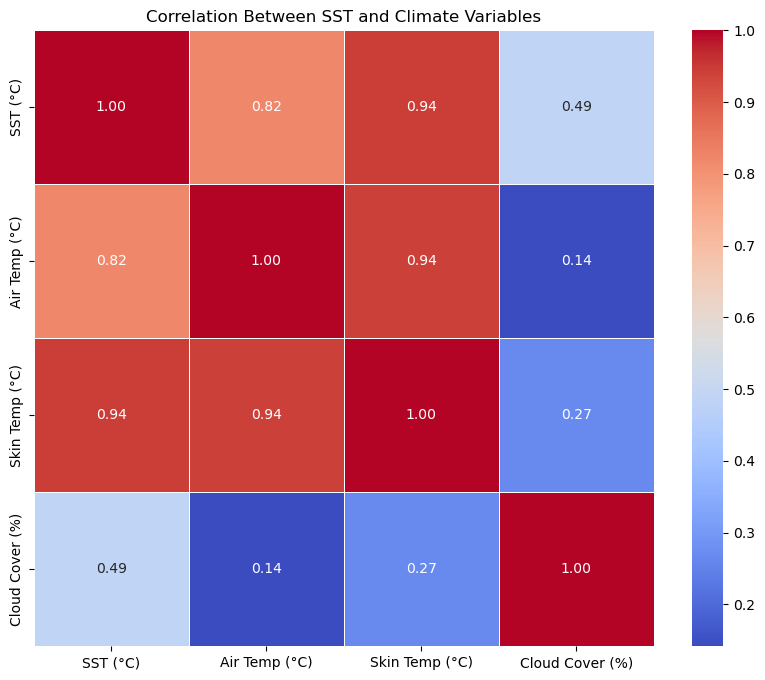

In [46]:
time_range = slice("2019-01-01", "2024-12-01")
sst = sst_data["sst"].sel(time=time_range).mean(dim=["lat", "lon"])
air_temp = konkan_airtemp["air"].sel(time=time_range).mean(dim=["lat", "lon"])         
# slicing time for only these 2 because otherwise shapes will vary between them and other variables as sst and airtemp time index is 73 and others is 72
skt = ds["skt"].mean(dim=["latitude", "longitude"])
tcc = ds["tcc"].mean(dim=["latitude", "longitude"])
msl = ds["skt"].mean(dim=["latitude", "longitude"])
v10=ds["v10"].mean(dim=["latitude", "longitude"])
u10=ds["u10"].mean(dim=["latitude", "longitude"])
# Create DataFrame
df = pd.DataFrame({ "SST (°C)": sst.values, "Air Temp (°C)": air_temp.values, "Skin Temp (°C)": skt.values, "Cloud Cover (%)": tcc.values })
# Compute correlation matrix
corr_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between SST and Climate Variables")
plt.show()

In [49]:
'''print(air_temp.shape)
print(sst.shape)
print(skt.shape)
print(tcc.shape)
print(v10.shape)
print(u10.shape)'''

'print(air_temp.shape)\nprint(sst.shape)\nprint(skt.shape)\nprint(tcc.shape)\nprint(v10.shape)\nprint(u10.shape)'